# Multiscale Centrality

## Example notebook

This notebook shows an example implementation of multiscale centrality

In [1]:
import networkx as nx
import sys as sys
import os as os
import pickle as pickle
import yaml as yaml
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

from multiscale_centrality import Multiscale_Centrality



Define graph as networkx object

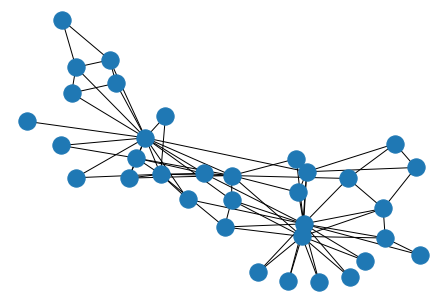

In [2]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

nx.draw(G)


Define hyperparameters for multiscale centrality

In [3]:
# random walk parameters
normalization_tpe = 'combinatorial'  # combinatorial laplacian
rw_tpe = 'continuous'  # continuous random walk
rev = False # undirected
t_min = -1.3  # maximum time (in spectral gap units)
t_max = 1    # maximum time (in spectral gap units)
n_t = 1000  # number of timesteps 
log = True
#plotting parameters
n_plot    = 50 # number of plots when scanning the time horizon

#number of cpu to use for parallel computations
n_processes = 2

target_nodes = [0,1,2,3,4,5,6,7,8,9]

mc = Multiscale_Centrality(G, pos, t_min = t_min, t_max = t_max, 
                           n_t = n_t, n_processes = n_processes, 
                           normalization_tpe = normalization_tpe, 
                           rw_tpe = rw_tpe, rev = rev,log=log,
                           target_nodes=target_nodes,
                           )

Spectral gap =  0.4685252267013903


100%|██████████| 1000/1000 [00:00<00:00, 1231.76it/s]


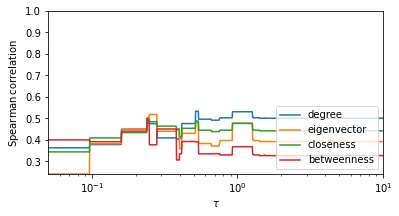

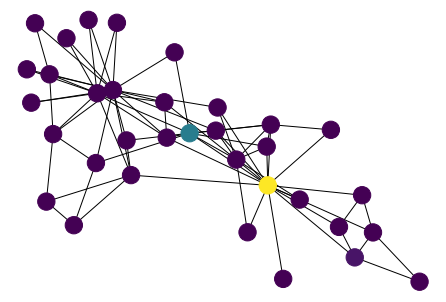

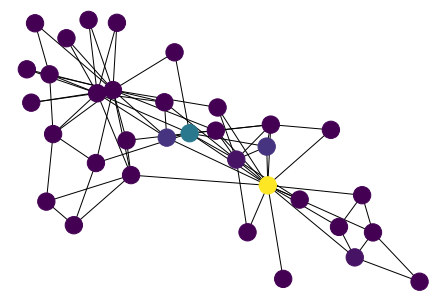

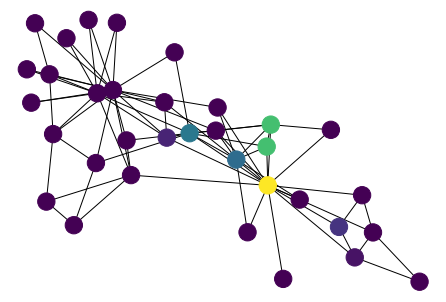

In [6]:

# compute multiscale
mc.compute_multiscale_centralities()

mc.compare_centralities(n_compare = n_t, n_top = 2, n_force = 100)
mc.figsize=(6,3)
mc.plot_comparisons_spearman()
 
plt.figure();nx.draw(G,pos=pos,node_color=mc.multiscale[:,0])
plt.figure();nx.draw(G,pos=pos,node_color=mc.multiscale[:,400])
plt.figure();nx.draw(G,pos=pos,node_color=mc.multiscale[:,900])